In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

In [2]:
df_init = pd.read_csv("data/data_cleaned_ph2.csv")
df_ref = pd.read_csv("data/lof/data-lof-2024-06-10.csv")

C:\Users\Soheil\AppData\Local\Temp\ipykernel_6316\594625013.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ref = pd.read_csv("data/lof/data-lof-2024-06-10.csv")


In [3]:
df = pd.read_csv("data/knn/data-knn-2024-06-17.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211709 entries, 0 to 211708
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        211709 non-null  int64  
 1   id_mls                    211709 non-null  object 
 2   bathrooms_total           211709 non-null  float64
 3   bedrooms_extra            211709 non-null  float64
 4   bedrooms                  211709 non-null  float64
 5   stories_total             211709 non-null  float64
 6   size_interior             211709 non-null  float64
 7   building_type             211709 non-null  object 
 8   agency_name               211709 non-null  object 
 9   agency_type               211709 non-null  object 
 10  property_type             211709 non-null  object 
 11  lng                       211709 non-null  float64
 12  lat                       211709 non-null  float64
 13  ownership_type            211709 non-null  o

In [5]:
df["province"].value_counts()

province
Ontario                    106163
British Columbia            45375
Alberta                     28939
Quebec                       9456
Saskatchewan                 8040
Manitoba                     6317
Nova Scotia                  3504
New Brunswick                2272
Prince Edward Island          745
Newfoundland & Labrador       699
Yukon                         137
Northwest Territories          62
Name: count, dtype: int64

In [6]:
df["province"].value_counts()

province
Ontario                    106163
British Columbia            45375
Alberta                     28939
Quebec                       9456
Saskatchewan                 8040
Manitoba                     6317
Nova Scotia                  3504
New Brunswick                2272
Prince Edward Island          745
Newfoundland & Labrador       699
Yukon                         137
Northwest Territories          62
Name: count, dtype: int64

In [7]:
# df = df.drop(["id", "id_mls", "agency_name", "agency_type", "property_type", "ownership_type", "land_size", "page_url", "timestamp", "postal_code"], axis=1)
# df.info()

In [8]:
np.round(df[df["province"]=="Ontario"]["price"].describe())

count      106163.0
mean       916887.0
std        519622.0
min        159900.0
25%        599900.0
50%        799000.0
75%       1090000.0
max      14800000.0
Name: price, dtype: float64

## Removing Interior Size Outliers from top

<Axes: title={'center': 'size_interior'}, xlabel='province'>

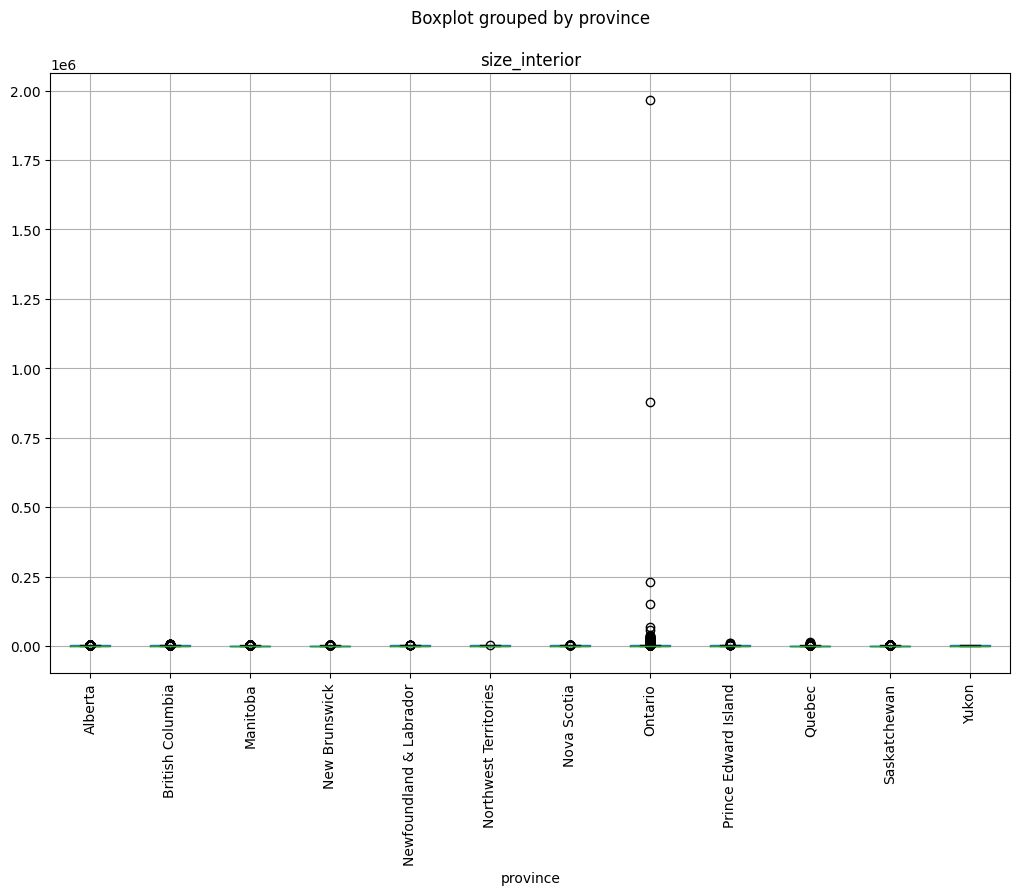

In [9]:
df.boxplot(column="size_interior", by="province", figsize=(12,8), rot=90)

In [10]:
q0 = 0
q25 = df_init["size_interior"].quantile(0.25)
q75 = df_init["size_interior"].quantile(0.75)
iqr = q75 - q25

df = df[(df["size_interior"]>=abs(q25-q0)*0.33) & (df["size_interior"] < (q75+1.5*iqr))]

abs(q25-q0)*0.33

335.94

<Axes: title={'center': 'size_interior'}, xlabel='province'>

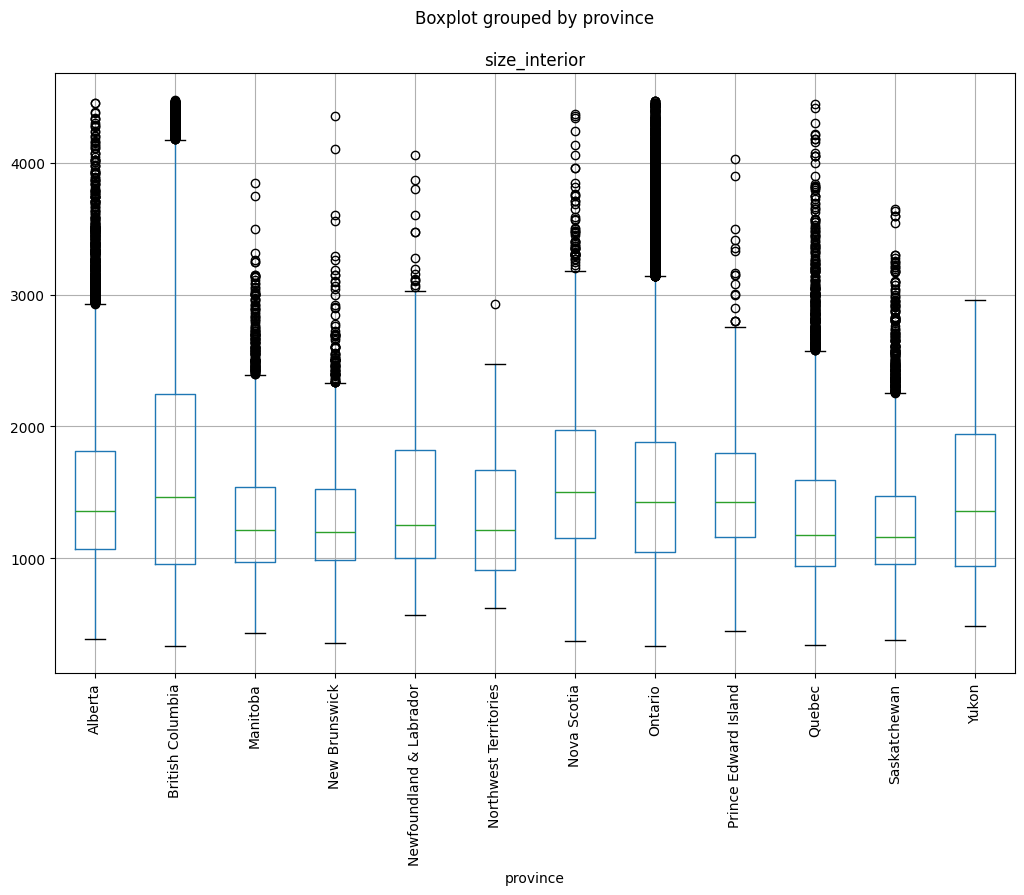

In [11]:
df.boxplot(column="size_interior", by="province", figsize=(12,8), rot=90)

<Axes: title={'center': 'price'}, xlabel='province'>

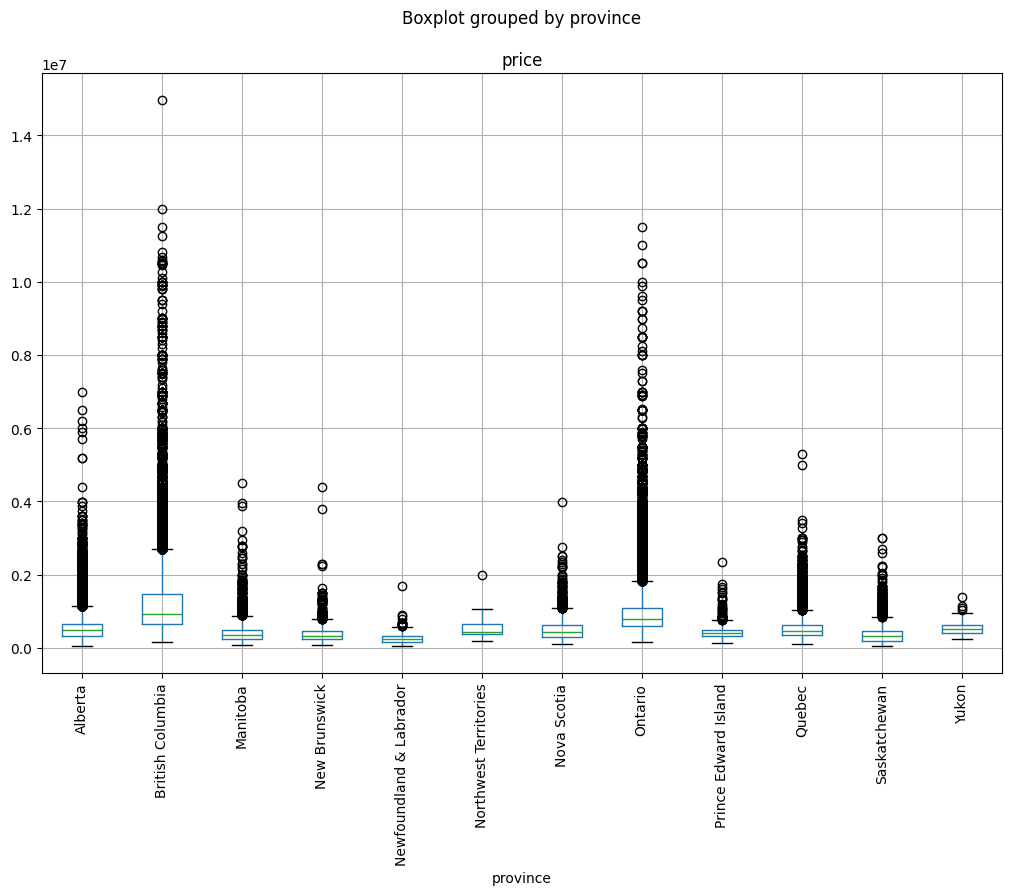

In [12]:
df.boxplot(column="price", by="province", figsize=(12,8), rot=90)

In [13]:
df["province"].value_counts()

province
Ontario                    105814
British Columbia            45333
Alberta                     28936
Quebec                       9447
Saskatchewan                 8039
Manitoba                     6317
Nova Scotia                  3504
New Brunswick                2272
Prince Edward Island          743
Newfoundland & Labrador       698
Yukon                         137
Northwest Territories          62
Name: count, dtype: int64

In [14]:
np.round(df[df["province"]=="Ontario"]["price"].describe())

count      105814.0
mean       916806.0
std        517391.0
min        159900.0
25%        599900.0
50%        799000.0
75%       1090000.0
max      11488000.0
Name: price, dtype: float64

# Anomaly Reduction

In [15]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

In [16]:
# Detect anomalies on the new dataset based on the previous dataset
lof = LocalOutlierFactor(n_neighbors=10, novelty=True)
scaler = StandardScaler()

df_ref_scaled = scaler.fit_transform(df_ref[["price", "size_interior", "bathrooms_total", "bedrooms", "bedrooms_extra", "stories_total", "parkings"]])
df_scaled = scaler.transform(df[["price", "size_interior", "bathrooms_total", "bedrooms", "bedrooms_extra", "stories_total", "parkings"]])
# lof_labels = lof.fit_predict(df_scaled)
# df = df[lof_labels==1]

# lof_labels = lof.fit_predict(df[["price", "size_interior", "bathrooms_total", "bedrooms", "bedrooms_extra", "stories_total", "parkings"]])
# df = df[lof_labels==1]

lof.fit(df_ref_scaled)

lof_labels = lof.predict(df_scaled)

df = df[lof_labels==1]

<Axes: title={'center': 'size_interior'}, xlabel='province'>

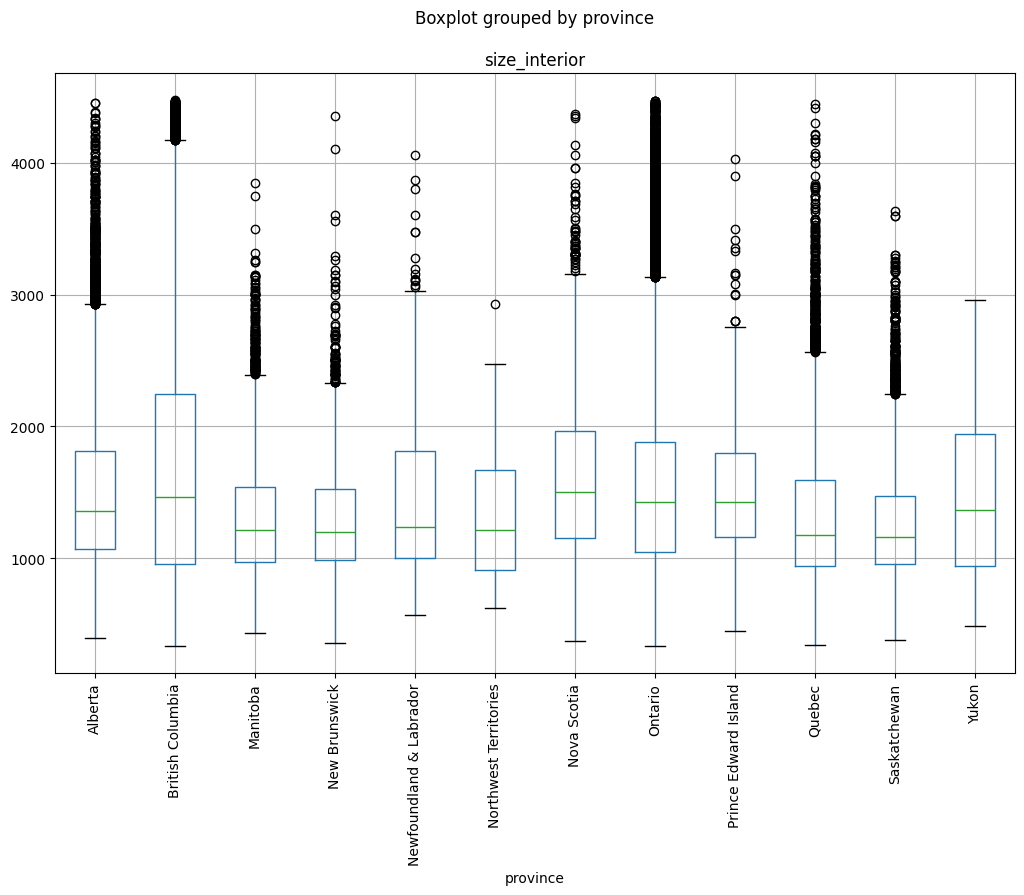

In [17]:
df.boxplot(column="size_interior", by="province", figsize=(12,8), rot=90)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209852 entries, 0 to 211708
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        209852 non-null  int64  
 1   id_mls                    209852 non-null  object 
 2   bathrooms_total           209852 non-null  float64
 3   bedrooms_extra            209852 non-null  float64
 4   bedrooms                  209852 non-null  float64
 5   stories_total             209852 non-null  float64
 6   size_interior             209852 non-null  float64
 7   building_type             209852 non-null  object 
 8   agency_name               209852 non-null  object 
 9   agency_type               209852 non-null  object 
 10  property_type             209852 non-null  object 
 11  lng                       209852 non-null  float64
 12  lat                       209852 non-null  float64
 13  ownership_type            209852 non-null  object

In [19]:
df["province"].value_counts()

province
Ontario                    104921
British Columbia            45129
Alberta                     28706
Quebec                       9410
Saskatchewan                 8008
Manitoba                     6301
Nova Scotia                  3482
New Brunswick                2266
Prince Edward Island          742
Newfoundland & Labrador       689
Yukon                         136
Northwest Territories          62
Name: count, dtype: int64

In [20]:
np.round(df[df["province"]=="Ontario"]["price"].describe())

count      104921.0
mean       916082.0
std        517386.0
min        159900.0
25%        599900.0
50%        799000.0
75%       1089900.0
max      11488000.0
Name: price, dtype: float64

In [21]:
df.to_csv("data/lof/data-lof-2024-06-17.csv", index=False)